## 5. Unsupervised learning

- Principal Component Analysis for Visualization

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.10.26 </div>
<div style="text-align: right\"> Last update: 2021.10.26</div>

- 출처 : https://machinelearningmastery.com/principal-component-analysis-for-visualization/?utm_source=drip&utm_medium=email&utm_campaign=Principal+component+analysis+for+visualization&utm_content=Principal+component+analysis+for+visualization

In [24]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')\
%matplotlib inline

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use('ggplot')

In [27]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

### Scatter plot of high dimensional data

와인 데이터셋

In [28]:
from sklearn.datasets import load_wine

In [29]:
winedata = load_wine()

In [30]:
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


13개 피처중에 2개 컬럼으로 scatter plotting

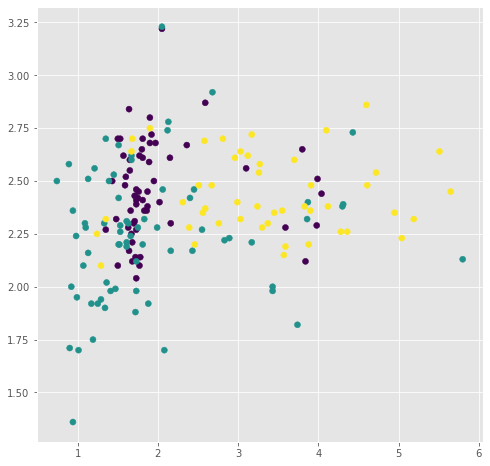

In [31]:
plt.figure(figsize = (8, 8))
plt.scatter(X[:, 1], X[:, 2], c = y)

3d로 그리기

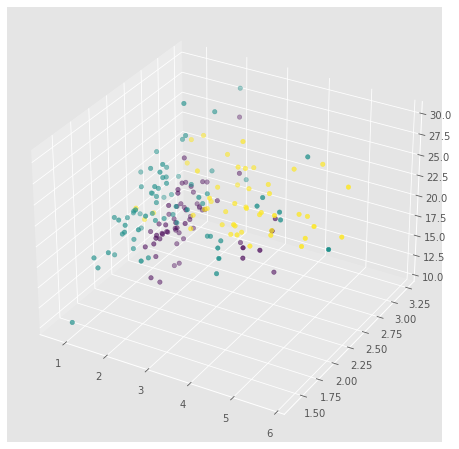

In [32]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
plt.show()

하지만 위 데이터는 전체를 표현하지 못한다. 이제 PCA를 그려본다.

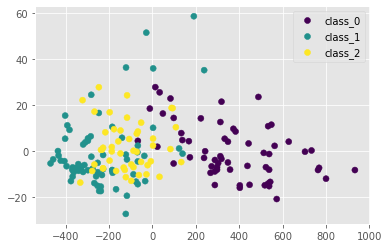

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

위에서 가장 많은 정보를 가지고 있는 두 컬럼의 정보로 scatter plot을 그렸다.

pca전에 데이터를 scale하면 더 명확한정보?? 를 얻을 수 있다.

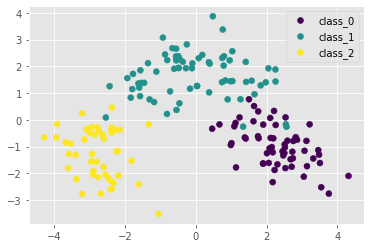

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

PCA가 scale에 sensitive하다. 따라서 standard scaler로 정규화 하면 더 좋은 결과를 얻을 수 있다. 이전과 비교해셔 분류가 더 잘되는 것처럼 보인다. 
위 결과로 분류에 대한 자신감을 얻을 수 있다.

전체 코드

X shape: (178, 13)
y shape: (178,)


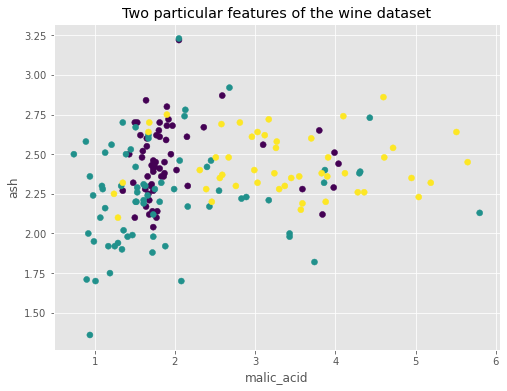

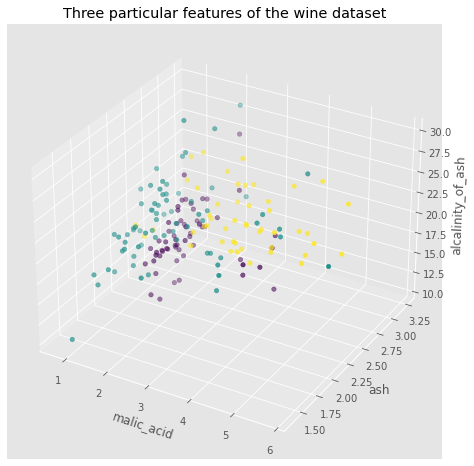

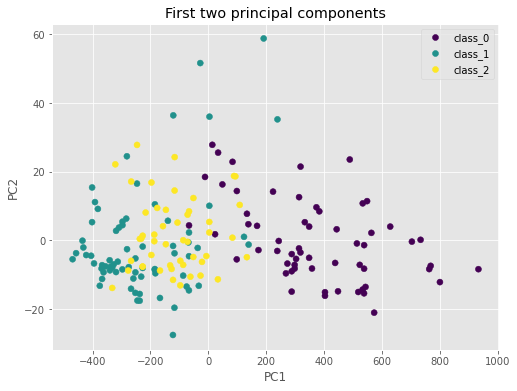

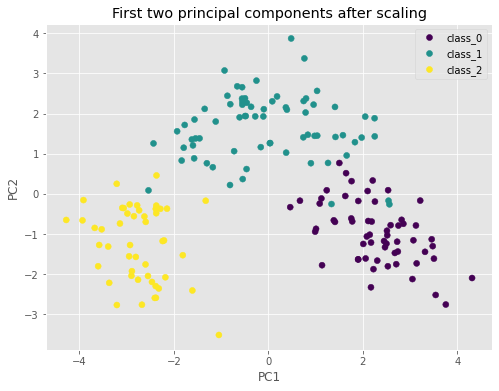

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
 
# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)
 
# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()
 
# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()
 
# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()
 
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

위 방법을 MNIST와 같은 다른 데이터셋에 적용하면 scatter plot은 클래스간 명확한 바운더리를 보여주지 못한다.

이말은 더 복잡한 비선형 네트워크로 분류모델을 구성해야함을 의미한다.

In [36]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

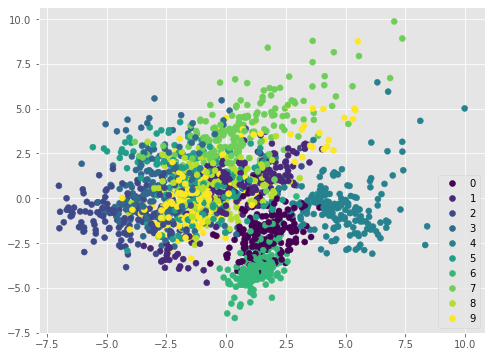

In [37]:
digitsdata = load_digits()
X, y = digitsdata['data'], digitsdata['target']
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(digitsdata['target_names']))
plt.show()

### Visualizing the explained variance

PCA를 한마디로 정의하면 피처를 선형조합으로 재정렬 하는 것이다. 이 것을 feature extractio technique이라고 한다. PCA의 한가지 특징중 하나는 첫번째 PC에 데이터셋에 대한 가장 많은 정보를 가지고 있다는 점이다. 두번째는 그다음으로 많고..

아이리스 데이터에서 두 컬럼으로 scatter를 그려보자.

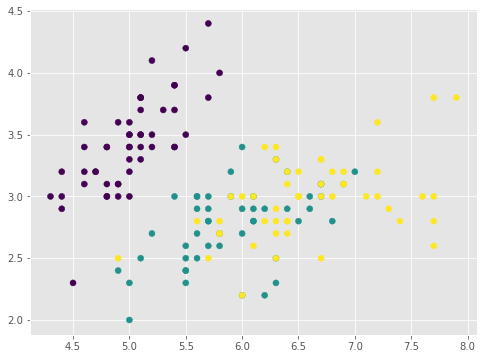

In [38]:
from sklearn.datasets import load_iris
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

이 데이터는 단위가 같기 때문에 scaling은 스킵하자.

그리고 pca를 진행해보자.

In [39]:
pca = PCA()
pca.fit(X)

PCA()

데이터의 피처수가 4이다. 따라서 pca는 4개 컴포넌트를 가진다.

In [40]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

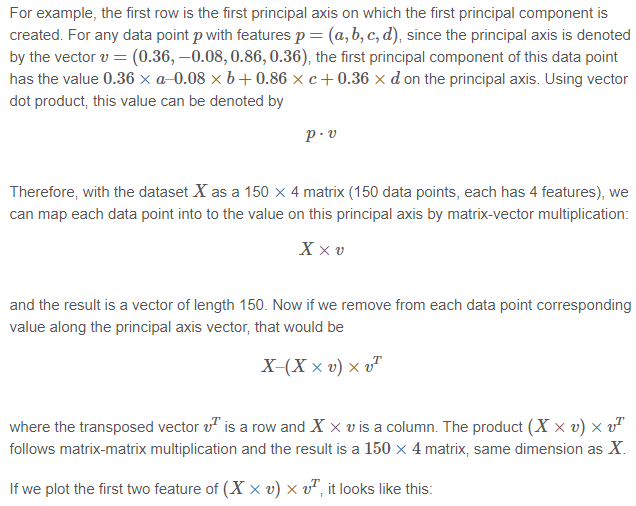

- 다시 볼것

먼저 앞의 두 피처를 그려본다.

In [41]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
X.mean(axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [43]:
Xmean = X - X.mean(axis = 0)

In [44]:
Xmean

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [45]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [48]:
pca.components_[0]

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

In [51]:
value = Xmean @ pca.components_[0] # 매트릭스 곱셈

In [52]:
value

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

In [53]:
value.reshape(-1, 1)

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ],
       [-2.50694709],
       [-2.61275523],
       [-2.78610927],
       [-3.22380374],
       [-2.64475039],
       [-2.38603903],
       [-2.62352788],
       [-2.64829671],
       [-2.19982032],
       [-2.5879864 ],
       [-2.31025622],
       [-2.54370523],
       [-3.21593942],
       [-2.30273318],
       [-2.35575405],
       [-2.50666891],
       [-2.46882007],
       [-2.56231991],
       [-2.63953472],
       [-2.63198939],
       [-2.58739848],
       [-2.4099325 ],
       [-2.64886233],
       [-2.59873675],
       [-2.63692688],
       [-2.86624165],
       [-2.62523805],
       [-2.80068412],
       [-2.98050204],
       [-2.59000631],
       [-2.77010243],
       [-2.84936871],
       [-2.99740655],
       [-2.40561449],
       [-2.20948924],
       [-2

In [54]:
pca.components_[0].reshape(1,-1)

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]])

In [55]:
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)

In [56]:
pc1

array([[-9.70007012e-01,  2.26869046e-01, -2.29941153e+00,
        -9.61693216e-01],
       [-9.80854414e-01,  2.29406079e-01, -2.32512540e+00,
        -9.72447646e-01],
       [-1.04404246e+00,  2.44184746e-01, -2.47491330e+00,
        -1.03509411e+00],
       [-9.92130098e-01,  2.32043280e-01, -2.35185453e+00,
        -9.83626688e-01],
       [-9.86121569e-01,  2.30637982e-01, -2.33761125e+00,
        -9.77669657e-01],
       [-8.24272089e-01,  1.92783990e-01, -1.95394540e+00,
        -8.17207367e-01],
       [-1.01930452e+00,  2.38398942e-01, -2.41627178e+00,
        -1.01056821e+00],
       [-9.49053581e-01,  2.21968375e-01, -2.24974121e+00,
        -9.40919374e-01],
       [-1.04310002e+00,  2.43964325e-01, -2.47267924e+00,
        -1.03415975e+00],
       [-9.65898108e-01,  2.25908040e-01, -2.28967133e+00,
        -9.57619529e-01],
       [-9.05977065e-01,  2.11893471e-01, -2.14762788e+00,
        -8.98212060e-01],
       [-9.44214708e-01,  2.20836641e-01, -2.23827061e+00,
      